## Cosmology - Problem Sheet 2
### Drishika Nadella

In [1]:
# Importing the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import odeint
from scipy import interpolate
from scipy.optimize import fsolve

# Some plot formatting
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['axes.titlesize'] = 10

#### 1.1

A cosmological model is defined by parameters such as:

* $H_p$: The Hubble Parameter (km/s/Mpc)
* $k$: The curvature of the Universe 
* $\Omega_m$: Cosmological matter density parameter
* $\Omega_r$: Cosmological radiation density parameter
* $\Omega_\Lambda$: Cosmological dark energy density parameter

Some popular cosmological models and their parameter values are listed below:

1. Einstein-de Sitter Universe (matter dominated universe)

* $H_0 = 67.3$ (km/s/Mpc)
* $k = 0$ (Flat Universe) 
* $\Omega_m = 1$
* $\Omega_r = 0$
* $\Omega_\Lambda = 0$

2. Low Matter Density Universe 

* $H_0 = 67.3$ (km/s/Mpc)
* $k = 0$ (Flat Universe)
* $\Omega_m = 0.3$
* $\Omega_r = 0$
* $\Omega_\Lambda = 0$

3. $\Lambda\textrm{CDM}$ Universe (the current favoured cosmological model)

* $H_0 = 67.3$ (km/s/Mpc)
* $k = 0$ (Flat Universe)
* $\Omega_m = 0.315$
* $\Omega_r = 10^{-5}$
* $\Omega_\Lambda = 0.685$

These cosmological models and their corresponding parameters are defined below

In [2]:
# Define cosmological parameters for the Einstein-de Sitter Universe
EdS = {'H0': 67.3, 'Om': 1., 'Ol': 0., 'Or': 0., 'k': 0.} 

# Define cosmological parameters the de Sitter Universe
LowM = {'H0': 67.3, 'Om': 0.3, 'Ol': 0., 'Or': 0., 'k': 0.}

# Define cosmological parameters the de Sitter Universe
LCDM = {'H0': 67.3, 'Om': 0.315, 'Ol': 0.685, 'Or': 2.47 * 1.e-5 / 0.67**2, 'k': 0.}

For ease of calculations, we can convert the Hubble parameter from $\textrm{km/s/Mpc}$ to SI units as follows:

$$ H_{si} = \frac{H_p \times 10^3}{10^6 \times 3 \times 10^{16}}$$

where we multiply by $10^3$ to convert $\textrm{km/s}$ to $\textrm{m/s}$ and divide by $10^6 \times 3 \times 10^{16}$ to convert $\textrm{Mpc}$ to $\textrm{m}$.

In [3]:
# Convert the Hubble parameter (km/s/Mpc) to SI units

def convert_Hp(H):
    """
    Convert the Hubble parameter units from (km/s/Mpc) to SI units
    
    Inputs:
    ------
    H:      Hubble parameter/constant in km/s/Mpc
    
    Outputs:
    ------
    Hsi:    Hubble parameter in m/s/m
    """
    pc = 3e16                                # 1 parsec in m
    Hsi = H * 1e3 / (1e6 * 3e16)
    return Hsi

The Hubble parameter at a given redshift $z$ can be calculated by the following formula:

$$ {H_p(z)}^2 = {H_0}^2 \left( (1 + z)^3 \Omega_m + (1 + z)^4 \Omega_r +(1 + z)^2 (1 - \Omega_m - \Omega_r - \Omega_\Lambda)  + \Omega_\Lambda \right) = H_0^2 E(z)^2$$

where

$$ E(z)^2 = \left( (1 + z)^3 \Omega_m + (1 + z)^4 \Omega_r +(1 + z)^2 (1 - \Omega_m - \Omega_r - \Omega_\Lambda)  + \Omega_\Lambda \right) $$

where $H_0$ is the Hubble parameter at present time i.e. the Hubble constant.

In [4]:
def Hubble_factor(z, H0, Om, Or, Ol):
    
    """
    Function to calculate the Hubble parameter at a given time/redshift for a specific cosmological model
    
    Inputs:
    ------
    z:       Redshift
    H0:      Hubble constant at present day
    Om:      Matter density parameter
    Or:      Radiation density parameter
    Ol:      Dark energy density parameter
    
    Outputs:
    -------
    H:       Hubble parameter at the given redshift for the given cosmological model
    """
    
    Ez = np.sqrt((1. + z)**4. * Or + (1. + z)**3. * Om + (1. + z)**2. * (1. - Om - Or - Ol) + Ol)
    H = H0 * Ez
    return H

The cosmological density parameters are defined as:

$$ \Omega_x (z) = \frac{\rho_x(t)}{\rho_{crit}(t)} $$

which are given at the present day as:

$$ \Omega_x = \frac{\rho_{x,0}}{\rho_{crit,0}} $$

where $\rho$ is the density and $x = m$, $x = r$ or $x = l$ correspond to matter, radiation or dark energy respectively. The critical density $\rho_{crit}$ is given by:

$$ \rho_{crit} = \frac{3H^2}{8\pi G} $$

At present day, it is:

$$ \rho_{crit, 0} = \frac{3H_0^2}{8\pi G} $$

The densities change with scale factor $a$ or redshift $z$ as follows:

$$ \rho_m = \rho_{m,0} a^{-3} = \rho_{m,0} (1+z)^{3}$$

$$ \rho_r = \rho_{r,0} a^{-4} = \rho_{r,0} (1+z)^{4} $$

$$ \rho_\Lambda = \rho_{\Lambda,0} $$

where $a = \frac{1}{1+z}$. Therefore, the density parameters $\Omega_x$ at a given redshift $z$ can be estimated for a given cosmological model as: 

$$ \Omega_m (z) = \frac{\rho_m(t)}{\rho_{crit}(t)} = \frac{\rho_{m,0} (1+z)^3}{\rho_{crit, 0}} \frac{\rho_{crit, 0}}{\rho_{crit}} = \Omega_m (1 + z)^3 \frac{H_0^2}{H(z)^2} = \frac{\Omega_m (1 + z)^3}{E(z)^2}$$

$$ \Omega_r (z) = \frac{\rho_r(t)}{\rho_{crit}(t)} = \frac{\rho_{r,0} (1+z)^4}{\rho_{crit, 0}} \frac{\rho_{crit, 0}}{\rho_{crit}} = \Omega_r (1 + z)^4 \frac{H_0^2}{H(z)^2} = \frac{\Omega_r (1 + z)^4}{E(z)^2} $$

$$ \Omega_\Lambda (z) = \frac{\rho_\Lambda(t)}{\rho_{crit}(t)} = \frac{\rho_{\Lambda,0}}{\rho_{crit, 0}} \frac{\rho_{crit, 0}}{\rho_{crit}} = \Omega_\Lambda \frac{H_0^2}{H(z)^2} = \frac{\Omega_\Lambda}{E(z)^2} $$

In [5]:
def density_param(z, OM0, OR0, OL0):
    
    """
    Calculates the density parameter at a certain redshift for a given cosmological model
    
    Inputs:
    ------
    z:       Redshift
    OM0:     Present day matter density parameter
    OR0:     Present day radiation density parameter
    OL0:     Present day dark energy density parameter   
    
    Outputs:
    -------
    OMt, ORt, OLt:       Matter, radiation and dark energy density parameters at a given epoch
    """
    
    Ez2 = ((1. + z)**4. * OR0 + (1. + z)**3. * OM0 + (1 + z)**2. * (1. - OM0 - OR0 - OL0) + OL0)
    OMt = OM0 * (1. + z)**3. / Ez2
    ORt = OR0 * (1. + z)**4. / Ez2
    OLt = OL0 / Ez2
    
    return OMt, ORt, OLt

The comoving $d_{comov}(z)$ and physical distances $d_{phys}(z)$ at different redshifts can then be estimated as:

$$ d_{comov}(z) = c \int_{0}^{z} \frac{1}{H_p(z^\prime)} \,dz^\prime $$

$$ d_{phys}(z) =  a(t) d_{comov}(z) = \frac{1}{1+z} d_{comov}(z)$$

where $c$ is the speed of light and $H_p$ is the Hubble parameter.

In [6]:
def integrand(z, H0, Om, Or, Ol):
    c = 3.e5      # Speed of light (km/s)
    return c / Hubble_factor(z, H0, Om, Or, Ol)

def dcomov(z, H0, Om, Or, Ol):
    
    """
    Calculates the comoving distance of an object at a given redshift and Hubble parameter
    
    Inputs:
    ------
    z:       Redshift
    H0:      Hubble constant at present day
    Om:      Matter density parameter
    Or:      Radiation density parameter
    Ol:      Dark energy density parameter
    
    Outputs:
    -------
    dcom:    Comoving distance of the object [Mpc]
    """
    
    dcom, _ = quad(integrand, 0., z, args=(H0, Om, Or, Ol), epsrel = 1e-012)
    return dcom

In [7]:
def dproper(dcom, z):
    """
    Function to calculate the proper distance / physical distance from the comoving distance
    
    Inputs:
    ------
    dcom:     Comoving distance at a given redshift [Mpc]
    z:        Redshift 
    
    Outputs:
    -------
    dphys:    Physical distance at a given redshift [Mpc]
    """
    
    dphys = 1. / (1. + z) * dcom
    return dphys

The cosmic time is the time that has elapsed since the Big Bang at the given redshift, or simply just the age of the Universe at the given redshift. It can be calculated as:

$$ t_{cosmic} = \int_{z}^{\infty} \frac{1}{(1 + z) H_p(z^\prime)} \,dz^\prime $$

In [8]:
def integrand2(z, H0, Om, Or, Ol):
    return 1. / ((1. + z) * Hubble_factor(z, H0, Om, Or, Ol))

def cosmic_time(z, H0, Om, Or, Ol):
    """
    Calculates the cosmic time i.e. time since Big Bang at a given redshift for a given cosmological model
    
    Inputs:
    ------
    z:       Redshift
    H0:      Hubble constant at present day
    Om:      Matter density parameter
    Or:      Radiation density parameter
    Ol:      Dark energy density parameter
    
    Outputs:
    -------
    tgy:    Cosmic time [Gyr]
    """
    t, _ = quad(integrand2, z, np.inf, args=(H0, Om, Or, Ol))        # Gives cosmic time in s
    tgy = t / (60. * 60. * 24. * 365. * 1e9)                         # To change units to Gyr
    return tgy

Now, to find the scale factor $a(t)$ as a function of time $t$. The scale factor and cosmic time are related as:

$$ \int_{a_{ini}}^{a_{fin}} \frac{1}{a E(a)} da = H_0 t = \int_{a_{ini}}^{a_{fin}} \frac{1}{\sqrt{\Omega_m a^{-1} + \Omega_r a^{-2} + \Omega_\Lambda a^{2}}} da $$

In [9]:
def scale_factor(H0, ct, Om, Or, Ol):
    """
    Calculates the scale factor a(t) as a function of cosmic time for given cosmological parameters
    
    Inputs:
    ------
    H0:      Hubble constant at present day
    ct:      Array of cosmic time for which scale factors will be calculated
    Om:      Matter density parameter
    Or:      Radiation density parameter
    Ol:      Dark energy density parameter
    
    Outputs:
    -------
    at:      Scale factor as a function of cosmic time
    """
    
    def integrand3(a, t):
        return H0 * np.sqrt(Om / a + Or / a**2 + Ol * a**2)
    
    ct = ct[::-1] * (3.154e7 * 1e9)  # Convert cosmic time to s and reverse so that it's in ascending order for integration
    aini = 1e-5                      # Initial scale factor (start from close to 0)
    at = odeint(integrand3, aini, ct)
    at = at[::-1]                    # Reverse scale factor so that it corresponds to the cosmic time (which was also reversed)
    at = at.flatten()                # Flatten the array for plotting
    
    return at

Defining a plotting function:

In [10]:
def plot_evolution(z, Hp, a, dc, dp, ct, om, ora, ol, model):
    
    """
    Plots the evolution of the cosmological parameters with redshift or time
    
    Inputs:
    ------
    z:       Redshift
    Hp:      Hubble parameter array
    a:       Scale factor array
    dc:      Comoving distance array
    dp:      Physical distance array
    ct:      Cosmic time array
    om:      Matter density parameter array
    ora:     Radiation density parameter array
    ol:      Dark energy density parameter array
    model:   Cosmological model used
    """    
    
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(10,6))
    fig.suptitle(model)

    ax1.plot(z, Hp, color='orange')
    ax1.set_title("Hubble parameter vs z")
    ax1.set_xlabel("z")
    # ax1.invert_xaxis()
    # ax1.set_xscale('log')
    # ax1.set_yscale('log')
    ax1.set_ylabel('Hp [km/s/Mpc]')

    ax2.plot(ct, a, color='black')
    ax2.set_title("Scale factor a(t) vs t")
    ax2.set_xlabel("t [Gyr]")
    # ax2.set_ylim(a.min(), 1.)
    # ax2.set_xscale('log')
    ax2.set_ylabel('a(t)')

    ax3.plot(z, dc, color='blue')
    ax3.set_title("Comoving distance vs z")
    ax3.set_xlabel("z")
    # ax3.set_xscale('log')
    # ax3.set_yscale('log')
    ax3.set_ylabel(r'$d_{comov}$ [Mpc]')

    ax4.plot(z, dp, color='red')
    ax4.set_title("Proper distance vs z")
    ax4.set_xlabel("z")
    # ax4.set_xscale('log')
    # ax4.set_yscale('log')
    ax4.set_ylabel(r'$d_{prop}$ [Mpc]')

    ax5.plot(z, ct, color='green')
    ax5.set_title("Cosmic time vs z")
    ax5.set_xlabel("z")
    # ax5.set_xscale('log')
    # ax5.set_yscale('log')
    ax5.set_ylabel('t [Gyr]')

    ax6.plot(z, om, '--', label=r'$\Omega_M$')
    ax6.plot(z, ora, '.', markersize=1, label=r'$\Omega_R$')
    ax6.plot(z, ol, '-.', label=r'$\Omega_L$')
    ax6.set_title(r'$\Omega$ vs z')
    ax6.set_xlabel("z")
    # ax6.set_xscale('log')
    ax6.set_ylabel(r'$\Omega$')
    ax6.legend()

    plt.tight_layout()
    plt.show()

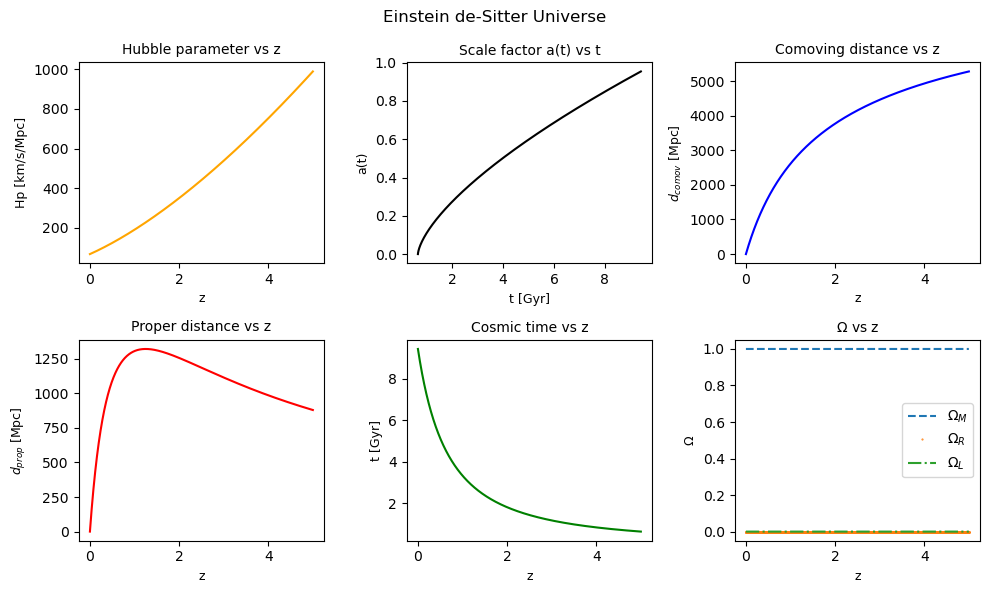

EdS Model: Age of the Universe: 9.42 Gyr


In [11]:
# Calculation and plotting for the Einstein-de Sitter Universe

# Calculate quantities for redshift from 0 to 5
z = np.linspace(0, 5, 5000)
dc_eds = []                   # Comoving distance list
ct_eds = []                   # Cosmic time list

Hsi = convert_Hp(EdS['H0'])

Hp_eds = Hubble_factor(z, EdS['H0'], EdS['Om'], EdS['Or'], EdS['Ol'])         # Hubble parameter calculation
for i in z:
    dc_eds.append(dcomov(i, EdS['H0'], EdS['Om'], EdS['Or'], EdS['Ol']))      # Comoving distance calculation
    ct_eds.append(cosmic_time(i, Hsi, EdS['Om'], EdS['Or'], EdS['Ol']))       # Cosmic time calculation
dc_eds = np.asarray(dc_eds)
ct_eds = np.asarray(ct_eds)
dp_eds = dproper(dc_eds, z)                                                   # Proper distance calculation

a_eds = scale_factor(Hsi, ct_eds, EdS['Om'], EdS['Or'], EdS['Ol'])            # Scale factor calculation
om_eds, ora_eds, ol_eds = density_param(z, EdS['Om'], EdS['Or'], EdS['Ol'])   # Density parameters calculation

plot_evolution(z, Hp_eds, a_eds, dc_eds, dp_eds, ct_eds, om_eds, ora_eds, ol_eds, 'Einstein de-Sitter Universe')

print(f'EdS Model: Age of the Universe: {ct_eds[0]:.2f} Gyr')

1. **$H_p$ vs z**: The Hubble parameter characterizes the rate at which the Universe is expanding at a given redshift. With increasing redshift, $H_p$ increases, meaning that in the Einstein-de Sitter model, the Universe was expanding faster at earlier times, and the expansion is decelerating now. This confirms our knowledge that in a matter dominated universe, expansion decelerates with time. 

2. **$a(t)$ vs t**: The scale factor increases with increasing time, showing that the Universe is expanding. But the curve gradually flattens over time, once again depicting that the expansion is decelerating over time. At the current age of the EdS universe (9.42 Gyr), $a(t)=1$, as expected.

3. **$d_{comov}$ vs z**: As redshift increases and we look farther into the beginning of the Universe, the comoving distance of an object increases because it is further away from us.

4. **$d_{phys}$ vs z**: The proper distance increases with increasing redshift up to a certain point: as the object is further away from us, its proper distance increases. But the proper distance also considers the expansion of the Universe. So at increasing redshifts beyond the 'turning point', the Universe had not expanded as much, so the proper distance begins to decrease at higher redshifts because the Universe was more compact then. 

5. **$t_{cosmic}$ vs z**: With increasing redshifts, the cosmic time decreases because at increasing redshifts, the Universe was younger. At $z=0$, we obtain the current age of the Universe. For an Einstein-de Sitter model, where matter dominates, the current age of the Universe is around 9.42 Gyr. 

6. **$\Omega$ vs z**: Since in a matter dominated Universe, $\Omega_m = 1$, and $\Omega_r = \Omega_\Lambda = 0$, the cosmological density parameters do not evolve over time because $E(z)^2 = \Omega_m (1+z)^3$ and $\Omega_m(z) = \frac{\Omega_m (1+z)^3}{\Omega_m (1+z)^3} = 1$ (and similarly for radiation and dark energy).

With my calculations, I obtain that the age of the Universe in the Einstein-de Sitter cosmological model as 9.42 Gyr. However, using the Ned Wright cosmological calculator, it is around 9.68 Gyr. I am not entirely sure what is causing the discrepancy in my calculations. I have checked if my Hubble parameter calculations are right using online cosmological calculators, and it is. So, my belief is that there is some error or simplification in the way the numerical integration using ```scipy.integrate.quad``` is performed. 

#### 1.2

Now, we still assume a matter dominated Universe, but the degree of matter domination varies. Therefore, apart from $\Omega_m$, which varies from strongly matter dominated ($\Omega_m = 1.0$) to weakly matter dominated ($\Omega_m = 0.3$), all other cosmological parameters still correspond to the Einstein-de Sitter model (therefore, we do not change $\Omega_\Lambda$ even as we change $\Omega_m$).

In [12]:
Oms = [1.0, 0.7, 0.3]          # Matter density parameter list
Hps = []                       # Save Hubble parameters of all 3 scenarios in this list
dcs = []                       # Save comoving distances of all 3 scenarios in this list
dps = []                       # Save proper distances of all 3 scenarios in this list
cts = []                       # Save cosmic times of all 3 scenarios in this list
omatters = []                  # Save evolution of matter density parameters of all 3 scenarios in this list
orads = []                     # Save evolution of radiation density parameters of all 3 scenarios in this list
olambdas = []                  # Save evolution of dark energy density parameters of all 3 scenarios in this list

for x in range(len(Oms)):
    
    # Define empty lists to store comoving distances and cosmic times for current Om
    dc = []                   # Comoving distance list
    ct = []                   # Cosmic time list
    
    Hp = Hubble_factor(z, EdS['H0'], Oms[x], EdS['Or'], EdS['Ol'])
    for i in z:
        dc.append(dcomov(i, EdS['H0'], Oms[x], EdS['Or'], EdS['Ol']))
        ct.append(cosmic_time(i, Hsi, Oms[x], EdS['Or'], EdS['Ol']))
    dc = np.asarray(dc)
    ct = np.asarray(ct)
    dp = dproper(dc, z)
    om, ora, ol = density_param(z, Oms[x], EdS['Or'], EdS['Ol'])
    
    # Append the values of the parameters for given Omega_m to the defined lists
    Hps.append(Hp)
    dcs.append(dc)
    cts.append(ct)
    dps.append(dp)
    omatters.append(om)
    orads.append(ora)
    olambdas.append(ol)    

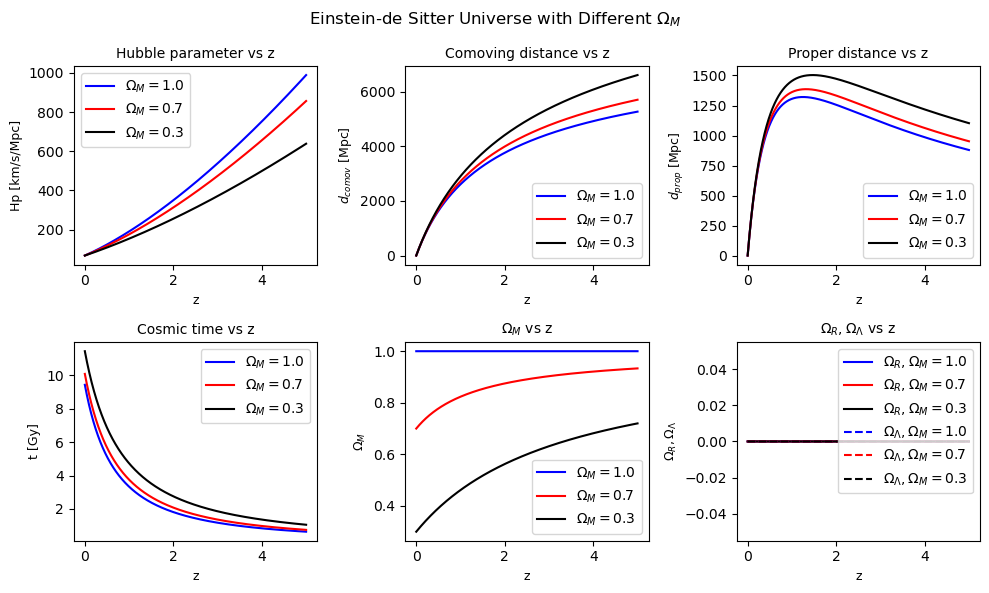

Age of the Universe for $\Omega_m$ = 1.0: 9.42 Gyr, $\Omega_m$ = 0.7: 10.08 Gyr, and $\Omega_m$ = 0.3: 11.43 Gyr


In [13]:
# Plotting 

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(10,6))
fig.suptitle(r'Einstein-de Sitter Universe with Different $\Omega_M$')

# Hubble parameters vs z
ax1.plot(z, Hps[0], color='blue', label=r'$\Omega_M = 1.0$')
ax1.plot(z, Hps[1], color='red', label=r'$\Omega_M = 0.7$')
ax1.plot(z, Hps[2], color='black', label=r'$\Omega_M = 0.3$')
ax1.set_title("Hubble parameter vs z")
ax1.set_xlabel("z")
ax1.set_ylabel('Hp [km/s/Mpc]')
ax1.legend()

# Comoving distances vs z
ax2.plot(z, dcs[0], color='blue', label=r'$\Omega_M = 1.0$')
ax2.plot(z, dcs[1], color='red', label=r'$\Omega_M = 0.7$')
ax2.plot(z, dcs[2], color='black', label=r'$\Omega_M = 0.3$')
ax2.set_title("Comoving distance vs z")
ax2.set_xlabel("z")
ax2.set_ylabel(r'$d_{comov}$ [Mpc]')
ax2.legend()

# Proper distances vs z
ax3.plot(z, dps[0], color='blue', label=r'$\Omega_M = 1.0$')
ax3.plot(z, dps[1], color='red', label=r'$\Omega_M = 0.7$')
ax3.plot(z, dps[2], color='black', label=r'$\Omega_M = 0.3$')
ax3.set_title("Proper distance vs z")
ax3.set_xlabel("z")
ax3.set_ylabel(r'$d_{prop}$ [Mpc]')
ax3.legend()

# Cosmic times vs z
ax4.plot(z, cts[0], color='blue', label=r'$\Omega_M = 1.0$')
ax4.plot(z, cts[1], color='red', label=r'$\Omega_M = 0.7$')
ax4.plot(z, cts[2], color='black', label=r'$\Omega_M = 0.3$')
ax4.set_title("Cosmic time vs z")
ax4.set_xlabel("z")
ax4.set_ylabel('t [Gy]')
ax4.legend()

# Matter density parameters vs z
ax5.plot(z, omatters[0], color='blue', label=r'$\Omega_M = 1.0$')
ax5.plot(z, omatters[1], color='red', label=r'$\Omega_M = 0.7$')
ax5.plot(z, omatters[2], color='black', label=r'$\Omega_M = 0.3$')
ax5.set_title(r"$\Omega_M$ vs z")
ax5.set_xlabel("z")
ax5.set_ylabel(r'$\Omega_M$')
ax5.legend()

# Radiation and dark energy density parameters vs z
ax6.plot(z, orads[0], color='blue', label=r'$\Omega_R, \Omega_M = 1.0$')
ax6.plot(z, orads[1], color='red', label=r'$\Omega_R, \Omega_M = 0.7$')
ax6.plot(z, orads[2], color='black', label=r'$\Omega_R, \Omega_M = 0.3$')
ax6.plot(z, olambdas[0], '--', color='blue', label=r'$\Omega_\Lambda, \Omega_M = 1.0$')
ax6.plot(z, olambdas[1],  '--', color='red', label=r'$\Omega_\Lambda, \Omega_M = 0.7$')
ax6.plot(z, olambdas[2],  '--', color='black', label=r'$\Omega_\Lambda, \Omega_M = 0.3$')
ax6.set_title(r"$\Omega_R, \Omega_\Lambda$ vs z")
ax6.set_xlabel("z")
ax6.set_ylabel(r'$\Omega_R, \Omega_\Lambda$')
ax6.legend()

plt.tight_layout()
plt.show()

print(r'Age of the Universe for $\Omega_m$ = 1.0: {:.2f} Gyr, $\Omega_m$ = 0.7: {:.2f} Gyr, and $\Omega_m$ = 0.3: {:.2f} Gyr'.format(cts[0][0], cts[1][0], cts[2][0]))

Increasing the matter domination of the Universe decelerates its expansion. This is reflected in all the plots above.

1. **$H_p$ vs z**: The Hubble parameter characterizes the rate at which the Universe is expanding at a given redshift. We see that with increasing $\Omega_m$, there is a steeper decrease in the Hubble parameter with redshift (i.e. the slope is higher), which means that the rate of deceleration of the Universe's expansion is greater with increasing $\Omega_m$. All 3 models converge to the same value at $z=0$ because the Hubble parameter at $z=0$ i.e. the Hubble constant is observationally derived and is the same in all cosmological models.

2. **$d_{comov}$ vs z**: At a given redshift, $d_{comov, \Omega_m=1.0}$ is lower than $d_{comov, \Omega_m=0.3}$. Since the expansion of the Universe is decelerated with increasing $\Omega_m$, in the $\Omega_m=1.0$ model, the Universe has not expanded as much, and therefore the comoving distance for that model is lower. Again, all 3 models converge to the same value at $z=0$ because the comoving distance is simply $c/H_0$ at $z=0$ and $H_0$ remains the same across the 3 models.

3. **$d_{phys}$ vs z**: At a given redshift, $d_{phys, \Omega_m=1.0}$ is lower than $d_{phys, \Omega_m=0.3}$. Since the expansion of the Universe is decelerated with increasing $\Omega_m$, in the $\Omega_m=1.0$ model, the Universe has not expanded as much, and therefore the physical distance for that model is lower. Again, all 3 models converge to the same value at $z=0$ because the physical distance is the same as the comoving distance, and is simply $c/H_0$ at $z=0$ and $H_0$ remains the same across the 3 models.

4. **$t_{cosmic}$ vs z**: Since increasing $\Omega_m$ causes the expansion of the Universe to slow down, we see that with increasing matter domination, the cosmic time is smaller i.e. the Universe is younger at a given redshift because it has not expanded as much. So, the age of the Universe (cosmic time at $z=0$) is approximately 9.5 Gyr for $\Omega_m = 1.$, 10 Gyr for $\Omega_m = 0.7$, and 11.5 Gyr for $\Omega_m = 0.3$.

5. **$\Omega_m$ vs z**: For a fully matter dominated Universe $\Omega_m = 1.0$, the matter density parameter does not change with redshift because the $(1+z)^3$ dependence in the numerator and denominator of the $\Omega_m(z)$ formula cancel each other out. However, for the weakly matter dominated Universes, there is a redshift dependence of the evolution of matter density parameter because the $(1 - \Omega_m - \Omega_r - \Omega_\Lambda)(1+z)^2$ factor in the denominator is no longer $0$, which means that the redshifts do not cancel each other out in the numerator and the denominator. In such a case, as the Universe ages, we see that the matter domination decreases.

6. **$\Omega_r, \Omega_\Lambda$ vs z**: Since $\Omega_r = \Omega_\Lambda = 0$, they do not evolve with redshift and do not affect the cosmological model.

#### 1.3

The above functions are already generalized for any given cosmological parameters. We can now compare the Einstein de-Sitter model with the $\Lambda\textrm{CDM}$ model. We already have the values for the Einstein-de Sitter model from 1.1. We can perform similar calculations for the model.

In [14]:
dc_lcdm = []                   # Comoving distance list
ct_lcdm = []                   # Cosmic time list

Hp_lcdm = Hubble_factor(z, LCDM['H0'], LCDM['Om'], LCDM['Or'], LCDM['Ol'])
for i in z:
    dc_lcdm.append(dcomov(i, LCDM['H0'], LCDM['Om'], LCDM['Or'], LCDM['Ol']))
    ct_lcdm.append(cosmic_time(i, Hsi, LCDM['Om'], LCDM['Or'], LCDM['Ol']))
dc_lcdm = np.asarray(dc_lcdm)
ct_lcdm = np.asarray(ct_lcdm)
dp_lcdm = dproper(dc_lcdm, z)
a_lcdm = scale_factor(Hsi, ct_lcdm, LCDM['Om'], LCDM['Or'], LCDM['Ol'])
om_lcdm, ora_lcdm, ol_lcdm = density_param(z, LCDM['Om'], LCDM['Or'], LCDM['Ol'])

# plot_evolution(z, Hp_lcdm, a_lcdm, dc_lcdm, dp_lcdm, ct_lcdm, om_lcdm, ora_lcdm, ol_lcdm, r'$\Lambda$CDM Universe')

print(f'LCDM Model: Age of the Universe: {ct_lcdm[0]:.2f} Gyr')

LCDM Model: Age of the Universe: 13.44 Gyr


With my calculations, I obtain that the age of the Universe in the Einstein-de Sitter cosmological model as 13.44 Gyr. However, using the Ned Wright cosmological calculator, it is around 13.81 Gyr. Again, I believe this discrepancy could be due to an issue with the numerical integration using ```scipy.integrate.quad```. 

We can now compare the EdS and LCDM models:

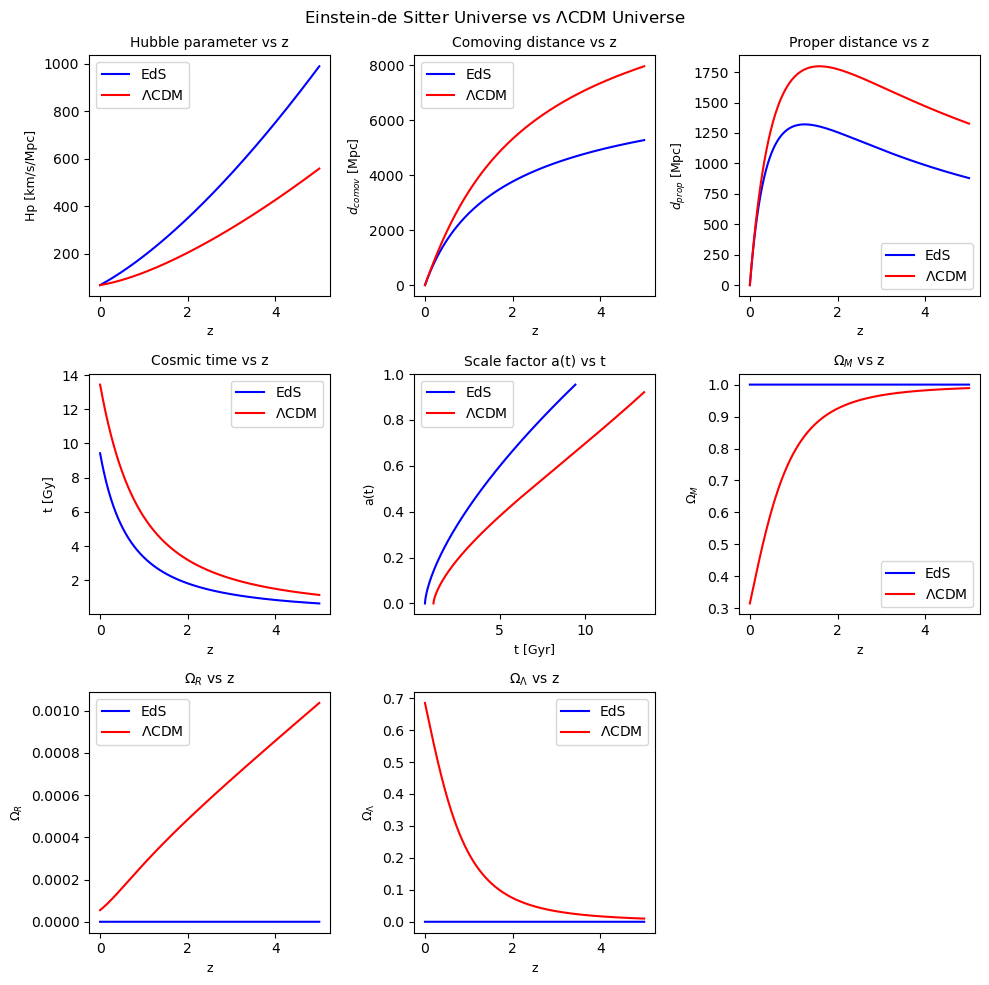

In [15]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(10,10))
fig.suptitle(r'Einstein-de Sitter Universe vs $\Lambda$CDM Universe')

ax1.plot(z, Hp_eds, color='blue', label=r'EdS')
ax1.plot(z, Hp_lcdm, color='red', label=r'$\Lambda$CDM')
ax1.set_title("Hubble parameter vs z")
# ax1.invert_xaxis()
ax1.set_xlabel("z")
ax1.set_ylabel('Hp [km/s/Mpc]')
ax1.legend()

ax2.plot(z, dc_eds, color='blue', label=r'EdS')
ax2.plot(z, dc_lcdm, color='red', label=r'$\Lambda$CDM')
ax2.set_title("Comoving distance vs z")
ax2.set_xlabel("z")
ax2.set_ylabel(r'$d_{comov}$ [Mpc]')
ax2.legend()

ax3.plot(z, dp_eds, color='blue', label=r'EdS')
ax3.plot(z, dp_lcdm, color='red', label=r'$\Lambda$CDM')
ax3.set_title("Proper distance vs z")
ax3.set_xlabel("z")
ax3.set_ylabel(r'$d_{prop}$ [Mpc]')
ax3.legend()

ax4.plot(z, ct_eds, color='blue', label=r'EdS')
ax4.plot(z, ct_lcdm, color='red', label=r'$\Lambda$CDM')
ax4.set_title("Cosmic time vs z")
ax4.set_xlabel("z")
ax4.set_ylabel('t [Gy]')
ax4.legend()

ax5.plot(ct_eds, a_eds, color='blue', label=r'EdS')
ax5.plot(ct_lcdm, a_lcdm, color='red', label=r'$\Lambda$CDM')
ax5.set_title("Scale factor a(t) vs t")
ax5.set_xlabel("t [Gyr]")
ax5.set_ylabel('a(t)')
ax5.legend()

ax6.plot(z, om_eds, color='blue', label=r'EdS')
ax6.plot(z, om_lcdm, color='red', label=r'$\Lambda$CDM')
ax6.set_title(r"$\Omega_M$ vs z")
ax6.set_xlabel("z")
ax6.set_ylabel(r'$\Omega_M$')
ax6.legend()

ax7.plot(z, ora_eds, color='blue', label=r'EdS')
ax7.plot(z, ora_lcdm, color='red', label=r'$\Lambda$CDM')
ax7.set_title(r"$\Omega_R$ vs z")
ax7.set_xlabel("z")
ax7.set_ylabel(r'$\Omega_R$')
ax7.legend()

ax8.plot(z, ol_eds, color='blue', label=r'EdS')
ax8.plot(z, ol_lcdm, color='red', label=r'$\Lambda$CDM')
ax8.set_title(r"$\Omega_\Lambda$ vs z")
ax8.set_xlabel("z")
ax8.set_ylabel(r'$\Omega_\Lambda$')
ax8.legend()

ax9.set_visible(False)

plt.tight_layout()
plt.show()

Comparing the Einstein-de Sitter and the LCDM models, we see that:

1. **$H_p$ vs z**: The Hubble parameter characterizes the rate at which the Universe is expanding at a given redshift. We see that for the EdS model, which has a high $\Omega_m$, there is a steeper decrease in the Hubble parameter with redshift (i.e. the slope is higher), which means that the rate of deceleration of the Universe's expansion is greater for EdS compared to LCDM. In fact, for the LCDM model, we see $H_p$ flattening out close to $z=0$, and as dark energy dominates, it will increase again. 

2. **$d_{comov}$ vs z**: At a given redshift, $d_{comov, EdS}$ is lower than $d_{comov, LCDM}$. Since the expansion of the Universe is decelerated with increasing $\Omega_m$, in the EdS model, the Universe has not expanded as much, and therefore the comoving distance for that model is lower. 

3. **$d_{phys}$ vs z**: At a given redshift, $d_{phys, EdS}$ is lower than $d_{phys, LCDM}$. Since the expansion of the Universe is decelerated with increasing $\Omega_m$, in the EdS model, the Universe has not expanded as much, and therefore the physical distance for that model is lower. At increasing redshifts beyond the 'turning point', the Universe had not expanded as much, so the proper distance begins to decrease at higher redshifts because the Universe was more compact then. This turning point is earlier for the LCDM model compared to the EdS model. Because in the LCDM model, there is more expansion, it makes sense that this turning point where the distances decrease again happens earlier.

4. **$t_{cosmic}$ vs z**: Since increasing $\Omega_m$ causes the expansion of the Universe to slow down, we see that with increasing matter domination, the cosmic time is smaller i.e. the Universe is younger at a given redshift because it has not expanded as much. So, the age of the Universe (cosmic time at $z=0$) is approximately 9.5 Gyr for the EdS model and approximately 13.5 Gyr for the LCDM model.

5. **a(t) vs t**: The scale factor a(t) is the ratio of the proper to the comoving distance, and is 1 at z=0, and 0 at the beginning of the Universe. The slope of the scale factor is higher for the EdS model because the age of the EdS Universe is smaller, so a(t) increases from 0 at 0 Gyr to 1 at 9.5 Gyr, whereas in the LCDM model, it can increase from 0 at 0 Gyr to 1 at 13.5 Gyr. So, it has more time to increase in the LCDM model, and therefore a smaller slope.

6. **$\Omega_m$ vs z**: For the EdS Universe $\Omega_m = 1.0$, the matter density parameter does not change with redshift because the $(1+z)^3$ dependence in the numerator and denominator of the $\Omega_m(z)$ formula cancel each other out. However, in the LCDM Universe, there is a redshift dependence of the evolution of matter density parameter because the $(1 - \Omega_m - \Omega_r - \Omega_\Lambda)(1+z)^2$ factor in the denominator is no longer $0$, which means that the redshifts do not cancel each other out in the numerator and the denominator. In such a case, as the Universe ages, we see that the matter domination decreases, which is what we see in observations as well, as dark energy matter density takes over and the Universe's expansion accelerates.

7. **$\Omega_r$ vs z**: Since $\Omega_r = 0$ for the EdS model, it does not evolve with redshift and does not affect the cosmological model. But for the LCDM model, $\Omega_r \neq 0$ (although negligibly small), so we see it decrease with decreasing redshift. This matches with our expectation as the very early Universe was radiation dominated, after which its influence has decreased. 

8. **$\Omega_\Lambda$ vs z**: Since $\Omega_\Lambda = 0$ for the EdS model, it does not evolve with redshift and does not affect the cosmological model. But for the LCDM model, $\Omega_\Lambda$ increases with decreasing redshift, which matches our expectations since we recently entered the dark energy dominated epoch in our Universe.

All of this goes to show that the $\Lambda \textrm{CDM}$ Universe is a more accurate representation of our observed Universe compared to the Einstein-de Sitter Universe.

#### 2.1

Now, we compare the densities of different cosmological models. We can find the evolution of densities with redshift $z$ as follows:

The densities change with scale factor $a$ or redshift $z$ as follows:

$$ \rho_m = \rho_{m,0} a^{-3} = \rho_{m,0} (1+z)^{3} $$

$$ \rho_r = \rho_{r,0} a^{-4} = \rho_{r,0} (1+z)^{4} $$

$$ \rho_\Lambda = \rho_{\Lambda,0} $$

$\rho_{m,0}$, $\rho_{r,0}$ and $\rho_{\Lambda,0}$ can be calculated as:

$$ \rho_{x,0} = \Omega_\textrm{x} \rho_{crit, 0}$$

where $x = m$, $x = r$ or $x = \Lambda$ correspond to matter, radiation or dark energy respectively. These are the present day cosmological density parameter values that change across models. At present day, $\rho_{crit, 0}$ is:

$$ \rho_{crit, 0} = \frac{3H_0^2}{8\pi G} $$

where $H_0$ is the Hubble constant and $G$ is the gravitational constant. Calculating the critical density:

In [16]:
def rho_crit(H0):
    """
    Calculates the critical density for a given Hubble parameter
    
    Inputs:
    ------
    H0:       Hubble parameter in SI units (m/s/m)
    
    Outputs:
    -------
    rhoc:     Critical density in SI units (kg/m^3)
    """
    
    G = 6.6743e-11           # Gravitational constant in SI units
    rhoc = 3 * H0**2 / (8. * np.pi * G)
    return rhoc

rho_c0 = rho_crit(Hsi)
print(f'The critical density today is {rho_c0:.2e} kg/m^3')

The critical density today is 9.00e-27 kg/m^3


We have calculated a value of $9.01 \times 10^{-27} \textrm{kg/m}^3$ whereas literature value is around $8.43 \times 10^{-27} \textrm{kg/m}^3$ (from Lecture 2b_1). This slight difference can be attributed to rounding errors in my assumptions of the constants. This critical density value should remain the same across models because our Hubble constant $H_0$ is the same across models. Let us now calculate the present day density values for the different models as:

$$ \rho_{x,0} = \Omega_\textrm{x} \rho_{crit, 0}$$

In [17]:
def rho0(rhoc, Om, Or, Ol):
    """
    Calculates the present day density values for a given cosmological model
    
    Inputs:
    ------
    rhoc:    Critical density in SI units (kg/m^3)
    Om:      Matter density parameter
    Or:      Radiation density parameter
    Ol:      Dark energy density parameter
    
    Outputs:
    -------
    rhom0, rhor0, rhol0:   Present day density values for a given cosmological model in kg/m^3
    """
    
    rhom0 = Om * rhoc
    rhor0 = Or * rhoc
    rhol0 = Ol * rhoc    
    return rhom0, rhor0, rhol0

rhom0_eds, rhor0_eds, rhol0_eds = rho0(rho_c0, EdS['Om'], EdS['Or'], EdS['Ol'])            # Einstein-de Sitter Universe
rhom0_lom, rhor0_lom, rhol0_lom = rho0(rho_c0, LowM['Om'], LowM['Or'], LowM['Ol'])         # Low density Universe
rhom0_lcdm, rhor0_lcdm, rhol0_lcdm = rho0(rho_c0, LCDM['Om'], LCDM['Or'], LCDM['Ol'])      # LCDM Universe

Now that we have the initial matter, radiation and dark energy densities, we can calculate their evolution with redshift.

In [18]:
def dens_evol(z, rhom0, rhor0, rhol0):
    
    """
    Calculates the evolution of densities with redshift for a given cosmological model
    
    Inputs:
    ------
    z:       Redshift
    rhom0:   Present day matter density for given model
    rhor0:   Present day radiation density for given model
    rhol0:   Present day dark energy density for given model
    
    Outputs:
    -------
    rhom:   Array of matter density evolution with redshift
    rhor:   Array of radiation density evolution with redshift
    rhol:   Array of dark energy density evolution with redshift
    """
    
    rhom = rhom0 * (1. + z)**3
    rhor = rhor0 * (1. + z)**4
    rhol = rhol0 
    return rhom, rhor, rhol

In [19]:
z1 = np.linspace(0, 10000, 50000)               # Defining a redshift from 0-10000
rhom_eds, rhor_eds, rhol_eds = dens_evol(z1, rhom0_eds, rhor0_eds, rhol0_eds)
rhom_lom, rhor_lom, rhol_lom = dens_evol(z1, rhom0_lom, rhor0_lom, rhol0_lom)
rhom_lcdm, rhor_lcdm, rhol_lcdm = dens_evol(z1, rhom0_lcdm, rhor0_lcdm, rhol0_lcdm)

Now, let us plot the densities as a function of present day critical density vs redshift:

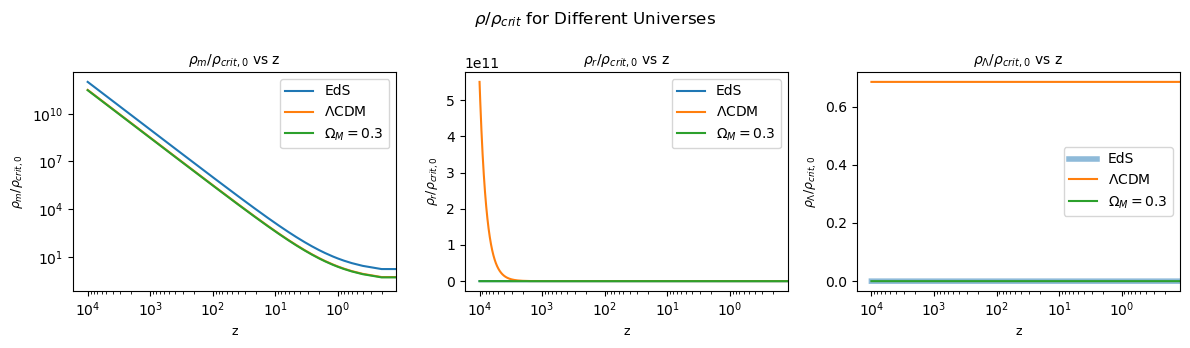

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3.5))
fig.suptitle(r'$\rho / \rho_{crit}$ for Different Universes')

ax1.loglog(z1, rhom_eds / rho_c0, label=r'EdS')
ax1.loglog(z1, rhom_lcdm / rho_c0, label=r'$\Lambda$CDM')
ax1.loglog(z1, rhom_lom / rho_c0, label=r'$\Omega_M=0.3$')
ax1.set_title(r"$\rho_m / \rho_{crit,0}$ vs z")
ax1.set_xlabel("z")
ax1.set_ylabel(r'$\rho_m / \rho_{crit,0}$')
ax1.invert_xaxis()
ax1.legend()

# ax2.loglog(z1, rhor_eds / rho_c0, label=r'EdS')
# ax2.loglog(z1, rhor_lcdm / rho_c0, label=r'$\Lambda$CDM')
# ax2.loglog(z1, rhor_lom / rho_c0, label=r'$\Omega_M=0.3$')
ax2.plot(z1, rhor_eds / rho_c0, label=r'EdS')
ax2.plot(z1, rhor_lcdm / rho_c0, label=r'$\Lambda$CDM')
ax2.plot(z1, rhor_lom / rho_c0, label=r'$\Omega_M=0.3$')
ax2.set_title(r"$\rho_r / \rho_{crit,0}$ vs z")
ax2.set_xscale('log')
ax2.set_xlabel("z")
ax2.set_ylabel(r'$\rho_r / \rho_{crit,0}$')
ax2.invert_xaxis()
ax2.legend()

# rho_lambda is not dependent on redshift, so it is a single value. But I repeat this value by len(z) for plotting
rhol_eds = np.repeat(rhol_eds, len(z1))
rhol_lom = np.repeat(rhol_lom, len(z1))
rhol_lcdm = np.repeat(rhol_lcdm, len(z1))

ax3.plot(z1, rhol_eds / rho_c0, linewidth=4, alpha=0.5,  label=r'EdS')
ax3.plot(z1, rhol_lcdm / rho_c0, label=r'$\Lambda$CDM')
ax3.plot(z1, rhol_lom / rho_c0, label=r'$\Omega_M=0.3$')
ax3.set_xscale('log')
ax3.set_title(r"$\rho_\Lambda / \rho_{crit,0}$ vs z")
ax3.set_xlabel("z")
ax3.set_ylabel(r'$\rho_\Lambda / \rho_{crit,0}$')
ax3.invert_xaxis()
ax3.legend()

plt.tight_layout()
plt.show()

The above plots depict $\rho_x / \rho_{crit}$ with increasing time i.e. decreasing redshift. So the right edges of the plots are present day values (z=0).

1. **$\rho_m / \rho_{crit}$ vs z**: $\rho_m$ decreases with decreasing redshift for all 3 models. 

2.  **$\rho_r / \rho_{crit}$ vs z**: $\rho_r$ decreases with decreasing redshift for the LCDM model since it has a non-zero value in the LCDM model, which means it can evolve with redshift. But for the EdS and weakly matter dominated Universes, $\rho_r$ remains $0.0$ throughout the evolution of the Universe.

3. **$\rho_\Lambda / \rho_{crit}$ vs z**: $\rho_\Lambda$ has no dependence on the redshift, so it does not change across redshifts for any of the models. The values remain at their present day $\Omega_m$ values of $0.0$ for the EdS and weakly matter dominated Universes, and $0.7$ for the LCDM model. 

#### 2.2

To find the equivalence epochs for the standard cosmological model, we need to find the points where $\rho_i = \rho_j$ for each Universe.

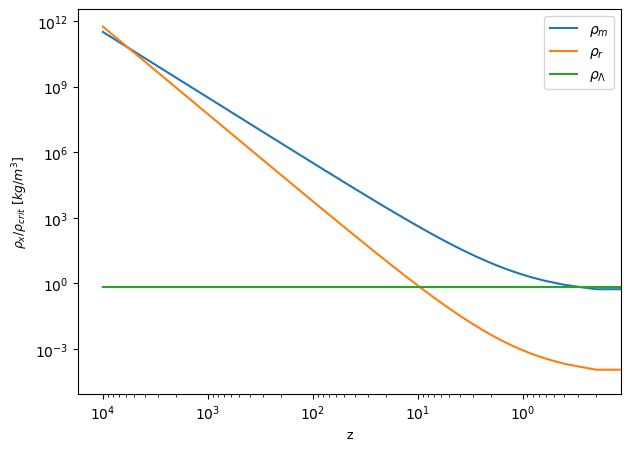

In [21]:
plt.figure(figsize=(7,5))
plt.plot(z1, rhom_lcdm / rho_c0, label=r'$\rho_m$')
plt.plot(z1, rhor_lcdm / rho_c0, label=r'$\rho_r$')
plt.plot(z1, rhol_lcdm / rho_c0, label=r'$\rho_\Lambda$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('z')
plt.ylabel(r'$\rho_x / \rho_{crit}$ [$kg/m^3$]')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

Above is the plot of how all 3 densities evolve with redshift for the LCDM model. To find the epoch of equivalence, we interpolate the $\rho_i$ and $\rho_j$ curves and find the points where they intersect.

In [22]:
# Interpolate the curves
f1 = interpolate.interp1d(z1, rhom_lcdm / rho_c0, fill_value="extrapolate")
f2 = interpolate.interp1d(z1, rhor_lcdm / rho_c0, fill_value="extrapolate")
f3 = interpolate.interp1d(z1, rhol_lcdm / rho_c0, fill_value="extrapolate")

y1 = f1(z1)
y2 = f2(z1)
y3 = f3(z1)

id1 = np.argwhere(np.diff(np.sign(y1 - y2))).flatten()
print("Matter-Radiation Epoch of Equivalence: z = ", np.round(z1[id1][0], 1))

id2 = np.argwhere(np.diff(np.sign(y3 - y2))).flatten()
print("Dark Energy-Radiation Epoch of Equivalence: z = ", np.round(z1[id2][0], 1))

id3 = np.argwhere(np.diff(np.sign(y1 - y3))).flatten()
print("Matter-Dark Energy Epoch of Equivalence: z = ", np.round(z1[id3][0], 1))

Matter-Radiation Epoch of Equivalence: z =  5723.7
Dark Energy-Radiation Epoch of Equivalence: z =  9.4
Matter-Dark Energy Epoch of Equivalence: z =  0.2


From the plot and the epoch of equivalence calculations:

- Radiation dominated era: $\infty < z < 5723$
- Matter dominated era: $5723 < z < 0.2$
- Dark energy dominated era: $z>0.2$

However, these values are not exactly right. The matter-radiation equivalence was at around $z=3300$, and the matter-dark energy equivalence was at around $z=0.4$ according to literature.

The Sun was born 4.603 billion years ago. Therefore, the cosmic time when the Sun was born according to the $\Lambda\textrm{CDM}$ model is $13.811 - 4.603 = 9.208 \textrm{ Gyr}$. The corresponding redshift is found as follows: 

In [23]:
ct_sun = 9.20      # Cosmic time when the Sun was born (Gyr)
z_sun = np.round(z[np.round(ct_lcdm, 2) == ct_sun], 2)
print("The redshift when the Sun was born was", z_sun[0])

The redshift when the Sun was born was 0.39


This was quite late in our Universe, just before the Matter-Dark Energy equivalence. 

The time when dinosaurs became extinct was 66 million years ago, which corresponds to a cosmic time in the $\Lambda\textrm{CDM}$ model of $13.44 - 0.066 = 13.374 \textrm{ Gyr}$. Therefore, the corresponding redshift:

In [24]:
ct_dino = 13.37      # Cosmic time when the dinosaurs disappeared (Gyr)
z_dino = np.round(z[np.round(ct_lcdm, 2) == ct_dino], 2)
print("The redshift when the dinosaurs disappeared was", z_dino[0])

The redshift when the dinosaurs disappeared was 0.01


This is again, very recent, and after the dark energy domination began.

#### 3.1

* The age of the Universe for the LCDM model (which is the model that the values in the table correspond to) is given by the cosmic time at redshift $z=0$. 

In [25]:
ct_lcdm_age = ct_lcdm[z == 0.][0]
print(f'Age of the Universe: {ct_lcdm_age:.2f} Gyr')

Age of the Universe: 13.44 Gyr


* The age at which the expansion of the Universe first started to accelerate is the age when dark energy density started to dominate. This is because $\ddot{a} > 0$ for the dark energy density dominated model, whereas it is $\ddot{a} < 0$ for matter and radiation dominated models, where $a$ is the scale factor, and characterizes the expansion of the Universe. We have seen in 2.2 that this is around $z = 0.2$. 

In [26]:
ct_lcdm_acc = ct_lcdm[np.round(z,1) == 0.2][0]
print(f'Cosmic time when expansion of the Universe accelerates: {ct_lcdm_acc:.2f} Gyr')

Cosmic time when expansion of the Universe accelerates: 11.53 Gyr


We can also directly calculate $\ddot{a}$ and find at which redshift we first obtain a positive value.

In [27]:
adot = np.gradient(ct_lcdm, a_lcdm)
adotdot = np.gradient(ct_lcdm, adot)
z_addpos = np.round(z[adotdot > 0][0], 2)
ct_addpos = ct_lcdm[np.round(z,2) == z_addpos][0]
print(f'Cosmic time when expansion of the Universe accelerates (a`` > 0): {ct_addpos:.2f} Gyr')

Cosmic time when expansion of the Universe accelerates (a`` > 0): 8.69 Gyr


This is relatively recent in our Universe's history.

* The age at which the energy density in matter and the cosmological constant were equal again corresponds to the epoch where we have the matter-dark energy density equivalence at $z=0.2$.  

In [28]:
ct_lcdm_acc = ct_lcdm[np.round(z,1) == 0.2][0]
print(f'Cosmic time when matter and dark energy density were equal: {ct_lcdm_acc:.2f} Gyr')

Cosmic time when matter and dark energy density were equal: 11.53 Gyr


#### 3.2

The civilization has made the following assumptions about their cosmological model:

* $h = 0.7$ 
* $k = 0$ (Flat Universe) 
* $\Omega_m = 1$
* $\Omega_r = 0$
* $\Omega_\Lambda = 0$ (ignored cosmological constant)

Therefore, the civilization believes it is an Einstein-de Sitter (matter dominated) Universe. The age of the Universe in such a model is: 

In [29]:
print(f'EdS Model: Age of the Universe: {ct_eds[0]:.2f} Gyr')

EdS Model: Age of the Universe: 9.42 Gyr


So, the civilization believes that the age of the Universe is 9.42 Gyr.

#### 4

We need to find the cosmic time, comoving and physical distances at $z = 13$ assuming a $\Lambda \textrm{CDM}$ cosmological model.

In [30]:
z13 = 13
dc13 = dcomov(z13, LCDM['H0'], LCDM['Om'], LCDM['Or'], LCDM['Ol'])
ct13 = cosmic_time(z13, Hsi, LCDM['Om'], LCDM['Or'], LCDM['Ol'])
dp13 = dproper(dc13, z13)
tfrac = ct13 / ct_lcdm_age
print(f'Age of the Universe at z=13: {ct13:.3f} Gyr')
print(f'Fraction of Universe history at z=13: {tfrac:.3f}')
print(f'Comoving distance at z=13: {dc13:.2f} Mpc')
print(f'Proper distance at z=13: {dp13:.2f} Mpc')

Age of the Universe at z=13: 0.319 Gyr
Fraction of Universe history at z=13: 0.024
Comoving distance at z=13: 10195.37 Mpc
Proper distance at z=13: 728.24 Mpc


Therefore, we see that with JWST, we can probe a time in the Universe when it was just 0.024 times the age of the current Universe, and we can see galaxies that are 10 Gpc away!